In [ ]:
import tensorflow as tf
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# **Exploring The Images**

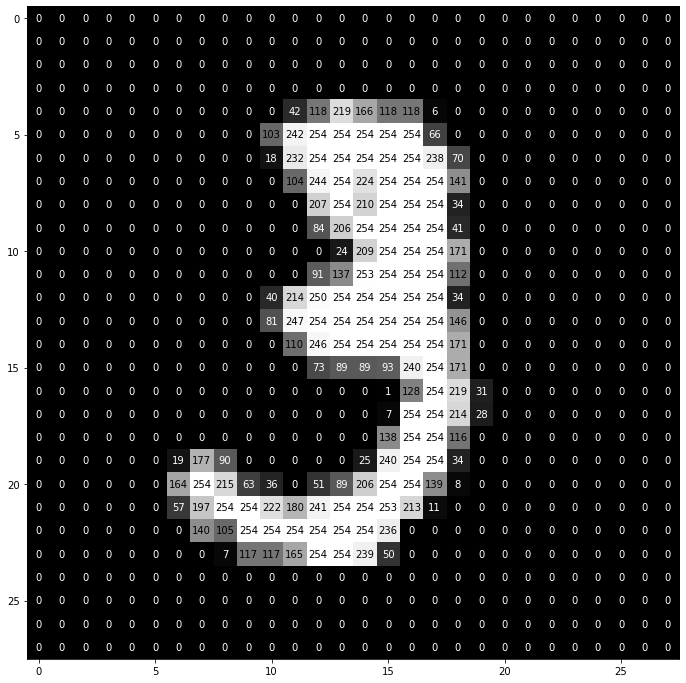

In [ ]:
img = np.squeeze(x_train[10])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

# **Reshaping The Dataset**

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# **Normalizing The Dataset**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [ ]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
x = tf.compat.v1.placeholder(tf.float32, shape=([None, 784]))
y = tf.compat.v1.placeholder(tf.float32, shape=([None, 10]))

In [ ]:
def mlp(x):
    # hidden layer1
    w1 = tf.Variable(tf.compat.v1.random_uniform([784,256]))
    b1 = tf.Variable(tf.zeros([256]))
    h1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    # hidden layer2
    w2 = tf.Variable(tf.compat.v1.random_uniform([256,128]))
    b2 = tf.Variable(tf.zeros([128]))
    h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
    # output layer
    w3 = tf.Variable(tf.compat.v1.random_uniform([128,10]))
    b3 = tf.Variable(tf.zeros([10]))
    logits= tf.matmul(h2, w3) + b3
    
    return logits

In [ ]:
logits = mlp(x)

In [ ]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

In [ ]:
train_op = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01).minimize(loss_op)

In [ ]:
# initialize
init = tf.compat.v1.global_variables_initializer()

# train hyperparameters
epoch_cnt = 30
batch_size = 1000
iteration = len(x_train) // batch_size

# Start training
with tf.compat.v1.Session() as sess:
    # Run the initializer
    sess.run(init)
    for epoch in range(epoch_cnt):
        avg_loss = 0.
        start = 0; end = batch_size
        
        for i in range(iteration):
            _, loss = sess.run([train_op, loss_op], 
                               feed_dict={x: x_train[start: end], y: y_train[start: end]})
            start += batch_size; end += batch_size
            # Compute average loss
            avg_loss += loss / iteration
            
        # Validate model
        preds = tf.nn.softmax(logits)  # Apply softmax to logits
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        #cur_val_acc = accuracy.eval({x: x_val, y: y_val})
        print("epoch: "+str(epoch)+", validation accuracy: " 
              + #str(cur_val_acc)  +
              ', loss: '+str(avg_loss))
    
    # Test model
    preds = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("[Test Accuracy] :", accuracy.eval({x: x_test, y: y_test}))

epoch: 0, validation accuracy: , loss: 6121.929919433593
epoch: 1, validation accuracy: , loss: 121.1447714964549
epoch: 2, validation accuracy: , loss: 16.016223359107972
epoch: 3, validation accuracy: , loss: 11.087456385294594
epoch: 4, validation accuracy: , loss: 10.171858759721127
epoch: 5, validation accuracy: , loss: 8.484858322143554
epoch: 6, validation accuracy: , loss: 8.15141013463338
epoch: 7, validation accuracy: , loss: 64.87502225240073
epoch: 8, validation accuracy: , loss: 20.954648534456894
epoch: 9, validation accuracy: , loss: 8.860460182030995
epoch: 10, validation accuracy: , loss: 7.393568003177643
epoch: 11, validation accuracy: , loss: 6.1811904986699435
epoch: 12, validation accuracy: , loss: 5.556338222821552
epoch: 13, validation accuracy: , loss: 7.404909745852153
epoch: 14, validation accuracy: , loss: 5.424991154670715
epoch: 15, validation accuracy: , loss: 5.792780733108518
epoch: 16, validation accuracy: , loss: 5.564222776889802
epoch: 17, validatio